**Import Library yang akan Digunakan**

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

**Muat dataset diabetes dari file diabetes.csv**

In [21]:
diabetes_dataset = pd.read_csv("diabetes.csv")

**Display lima baris pertama dari dataset**

In [22]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Cek Jumlah pasien (baris) dan atribut (kolom) dari dataset**

In [23]:
diabetes_dataset.shape

(768, 9)

**Cek informasi statistik deskriptif dari dataset**

In [24]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Hitung jumlah pasien yang memiliki diabetes (1) dan yang tidak memiliki diabetes (0)**

In [25]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Hitung rata-rata untuk setiap atribut berdasarkan apakah pasien memiliki diabetes atau tidak**

In [26]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


**Pisahkan dataset menjadi dua bagian: X, yang berisi atribut atau fitur, dan Y, yang berisi label atau variabel target**

In [27]:
# separating the data and labels
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [28]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


**Normalisasi data menggunakan StandardScaler**

In [29]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


**Bagi dataset menjadi dua subset: satu untuk pelatihan model (X_train dan Y_train) dan satu untuk pengujian (X_test dan Y_test)**

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


**Latih Model SVM**

In [31]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

**Evaluasi Model dan Nilai Akurasi**

In [32]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


**Lakukan pada data pengujian juga**

In [33]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


**Hitung Presisi, Recall dan F1 score**

In [34]:
precision = precision_score(Y_test, X_test_prediction)
recall = recall_score(Y_test, X_test_prediction)
f1 = f1_score(Y_test, X_test_prediction)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

Precision:  0.7567567567567568
Recall:  0.5185185185185185
F1 score:  0.6153846153846154


In [38]:
test_data_accuracy *= 100
precision *= 100
recall *= 100
f1 *= 100

print(f'Accuracy score of the test data : {test_data_accuracy:.2f}%')
print(f'Precision: {precision:.2f}%')
print(f'Recall: {recall:.2f}%')
print(f'F1 score: {f1:.2f}%')

Accuracy score of the test data : 77.27%
Precision: 75.68%
Recall: 51.85%
F1 score: 61.54%


**Visualisasi**

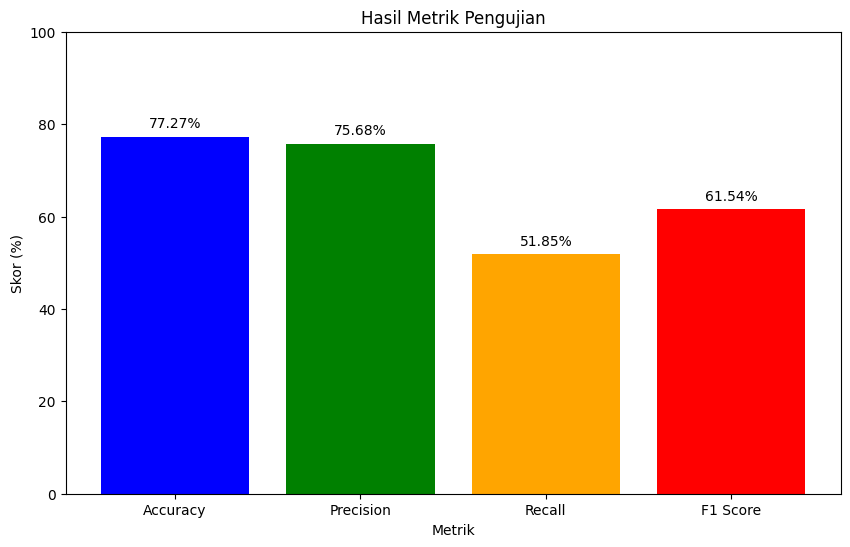

In [39]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [test_data_accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 100)
plt.title('Hasil Metrik Pengujian')
plt.xlabel('Metrik')
plt.ylabel('Skor (%)')

for i in range(len(metrics)):
    plt.text(i, scores[i] + 2, f'{scores[i]:.2f}%', ha='center')
plt.show()

#Buat Sistem Prediksi

In [36]:
input_data = (5,166,72,19,175,25.8,0.587,51)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('Pasien ini tidak memiliki riwayat diabetes')
else:
  print('Pasien ini memiliki riwayat diabetes')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[0]
Pasien ini tidak memiliki riwayat diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
